In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)

In [6]:
data = pd.read_csv('ds_salaries.csv')
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [7]:
data.drop(columns=['salary', 'salary_currency'], inplace=True)
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


In [8]:
#Check the missing value
check_missing = data.isnull().sum() * 100 / data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [9]:
#Check the number of unique value on object datatype
# df.select_dtypes(include='object').nunique()

data.select_dtypes(include = 'object').nunique()

experience_level       4
employment_type        4
job_title             93
employee_residence    78
company_location      72
company_size           3
dtype: int64

In [11]:
data.job_title.unique()


array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [12]:
def segment_job_title(job_title):
    data_scientist_titles = ['Principal Data Scientist', 'Data Scientist', 'Applied Scientist', 'Research Scientist', 'Applied Data Scientist', 'Lead Data Scientist', 'Staff Data Scientist', 'Principal Data Analyst', 'Principal Data Engineer']
    machine_learning_titles = ['ML Engineer', 'Machine Learning Engineer', 'Applied Machine Learning Engineer', 'Machine Learning Researcher', 'Machine Learning Scientist', 'Autonomous Vehicle Technician', 'Applied Machine Learning Scientist', 'Principal Machine Learning Engineer', 'Machine Learning Developer', 'Lead Machine Learning Engineer', 'Machine Learning Manager']
    data_analyst_titles = ['Data Analyst', 'Data Quality Analyst', 'Compliance Data Analyst', 'Business Data Analyst', 'Staff Data Analyst', 'Lead Data Analyst', 'BI Data Analyst', 'Marketing Data Analyst', 'Finance Data Analyst']
    data_engineer_titles = ['Data Modeler', 'Data Engineer', 'ETL Engineer', 'Data DevOps Engineer', 'Big Data Engineer', 'Data Infrastructure Engineer', 'Software Data Engineer', 'Cloud Database Engineer', 'Cloud Data Engineer', 'Cloud Data Architect', 'Lead Data Engineer', 'Principal Data Engineer']
    bi_analytics_titles = ['Data Analytics Manager', 'Business Intelligence Engineer', 'Analytics Engineer', 'BI Data Engineer', 'Director of Data Science', 'BI Developer', 'Insight Analyst', 'Data Analytics Specialist', 'Data Analytics Lead', 'Power BI Developer', 'Cloud Data Architect']
    other_titles = ['Data Strategist', 'Computer Vision Engineer', 'AI Developer', 'Head of Data']

    if job_title in data_scientist_titles:
        return 'Data Scientist'
    elif job_title in machine_learning_titles:
        return 'Machine Learning Engineer'
    elif job_title in data_analyst_titles:
        return 'Data Analyst'
    elif job_title in data_engineer_titles:
        return 'Data Engineer'
    elif job_title in bi_analytics_titles:
        return 'Business Intelligence and Analytics'
    elif job_title in other_titles:
        return 'Other'
    else:
        return 'Uncategorized'

In [13]:
data['job_title'] = data['job_title'].apply(segment_job_title)

<AxesSubplot:>

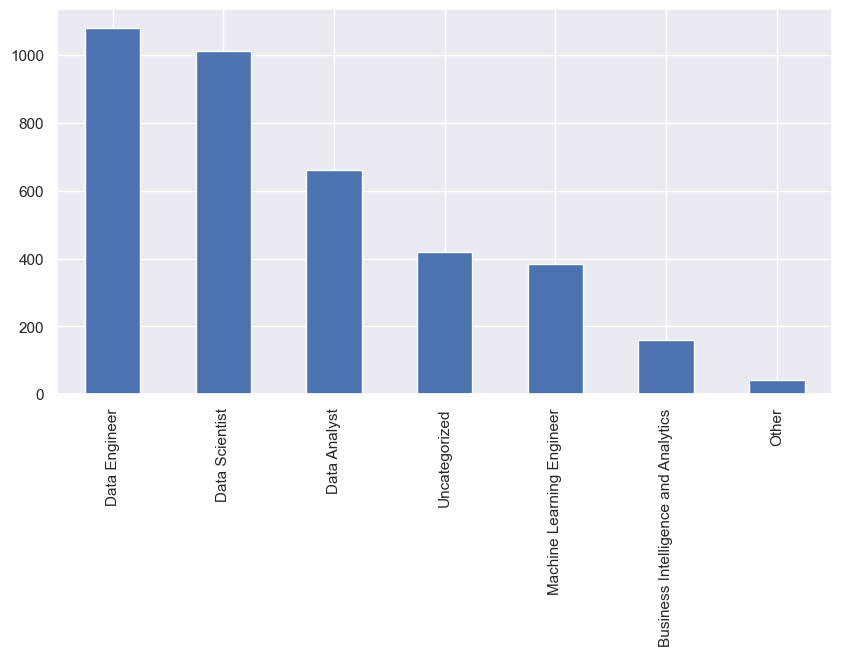

In [14]:
plt.figure(figsize=(10,5))
data['job_title'].value_counts().plot(kind='bar')

In [15]:
data.employee_residence.unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'PT', 'NL', 'CH',
       'CF', 'FR', 'AU', 'FI', 'UA', 'IE', 'IL', 'GH', 'AT', 'CO', 'SG',
       'SE', 'SI', 'MX', 'UZ', 'BR', 'TH', 'HR', 'PL', 'KW', 'VN', 'CY',
       'AR', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA',
       'LT', 'BE', 'AS', 'IR', 'HU', 'SK', 'CN', 'CZ', 'CR', 'TR', 'CL',
       'PR', 'DK', 'BO', 'PH', 'DO', 'EG', 'ID', 'AE', 'MY', 'JP', 'EE',
       'HN', 'TN', 'RU', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'NZ', 'MD', 'LU',
       'MT'], dtype=object)

In [20]:
def categorize_region(country):
    if country in ['DE', 'GB', 'PT', 'NL', 'CH', 'CF', 'FR', 'FI', 'UA', 'IE', 'AT', 'SG', 'SE', 'SI', 'UZ', 'HR', 'PL', 'CY', 'AM', 'BA', 'GR', 'MK', 'LV', 'RO', 'IT', 'MA', 'LT', 'BE', 'AS', 'HU', 'SK', 'CZ', 'JE', 'RS', 'MD', 'LU', 'MT']:
        return 'Europe'
    elif country in ['US', 'CA', 'MX']:
        return 'North America'
    elif country in ['BR', 'AR', 'CL', 'BO', 'CR', 'DO', 'PR', 'HN', 'UY']:
        return 'South America'
    elif country in ['NG', 'GH', 'KE', 'TN', 'DZ']:
        return 'Africa'
    elif country in ['HK', 'IN', 'CN', 'JP', 'KR', 'BD', 'VN', 'PH', 'MY', 'ID', 'AE']:
        return 'Asia'
    elif country in ['AU', 'NZ']:
        return 'Oceania'
    else:
        return 'Unknown'

# Apply the function to the "employee residence" column to create a new column with the categorized values
# df['employee_residence'] = df['employee_residence'].apply(categorize_region)

In [21]:
data['employee_residence'] = data['employee_residence'].apply(categorize_region)

<AxesSubplot:>

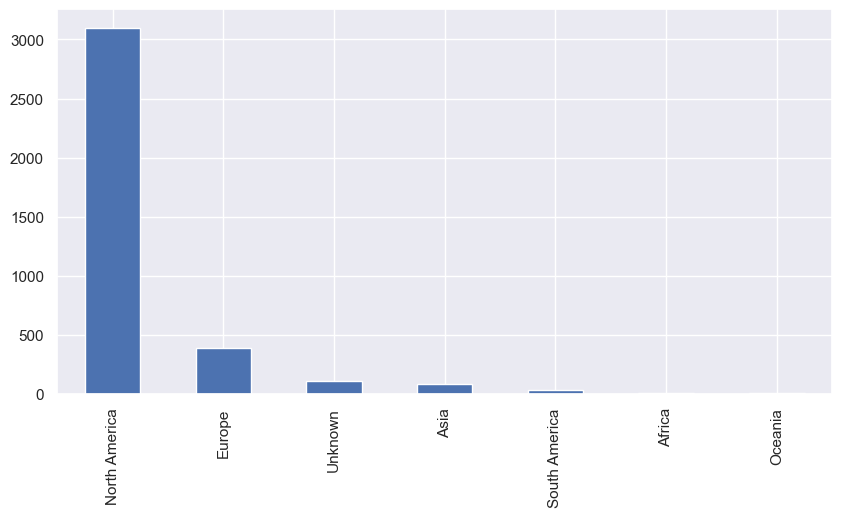

In [22]:
plt.figure(figsize=(10,5))
data['employee_residence'].value_counts().plot(kind='bar')

In [23]:
data.company_location.unique()


array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI',
       'MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE',
       'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT',
       'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK',
       'BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

In [24]:
# Define a function to categorize the unique values
def categorize_region(country):
    if country in ['DE', 'GB', 'PT', 'NL', 'CH', 'CF', 'FR', 'FI', 'UA', 'IE', 'AT', 'SG', 'SE', 'SI', 'UZ', 'HR', 'PL', 'CY', 'AM', 'BA', 'GR', 'MK', 'LV', 'RO', 'IT', 'MA', 'LT', 'BE', 'AS', 'HU', 'SK', 'CZ', 'JE', 'RS', 'MD', 'LU', 'MT']:
        return 'Europe'
    elif country in ['US', 'CA', 'MX']:
        return 'North America'
    elif country in ['BR', 'AR', 'CL', 'BO', 'CR', 'DO', 'PR', 'HN', 'UY']:
        return 'South America'
    elif country in ['NG', 'GH', 'KE', 'TN', 'DZ']:
        return 'Africa'
    elif country in ['HK', 'IN', 'CN', 'JP', 'KR', 'BD', 'VN', 'PH', 'MY', 'ID', 'AE']:
        return 'Asia'
    elif country in ['AU', 'NZ']:
        return 'Oceania'
    else:
        return 'Unknown'

In [25]:
data['company_location'] = data['company_location'].apply(categorize_region)


<AxesSubplot:>

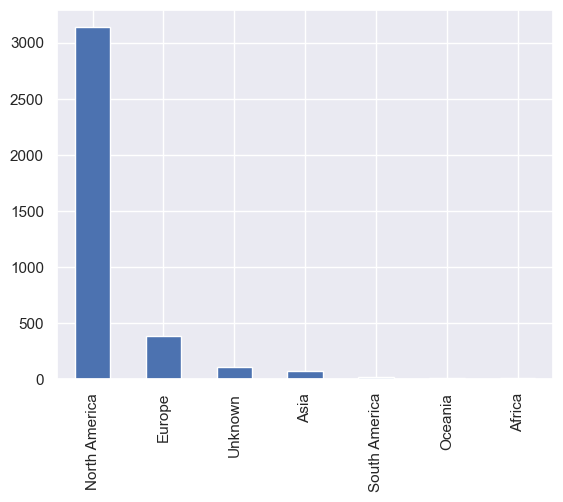

In [27]:
data['company_location'].value_counts().plot(kind='bar')


In [28]:
data.select_dtypes(include='object').nunique()


experience_level      4
employment_type       4
job_title             7
employee_residence    7
company_location      7
company_size          3
dtype: int64

# Exploratory data analysis

In [29]:
data.remote_ratio.unique()

array([100,   0,  50], dtype=int64)

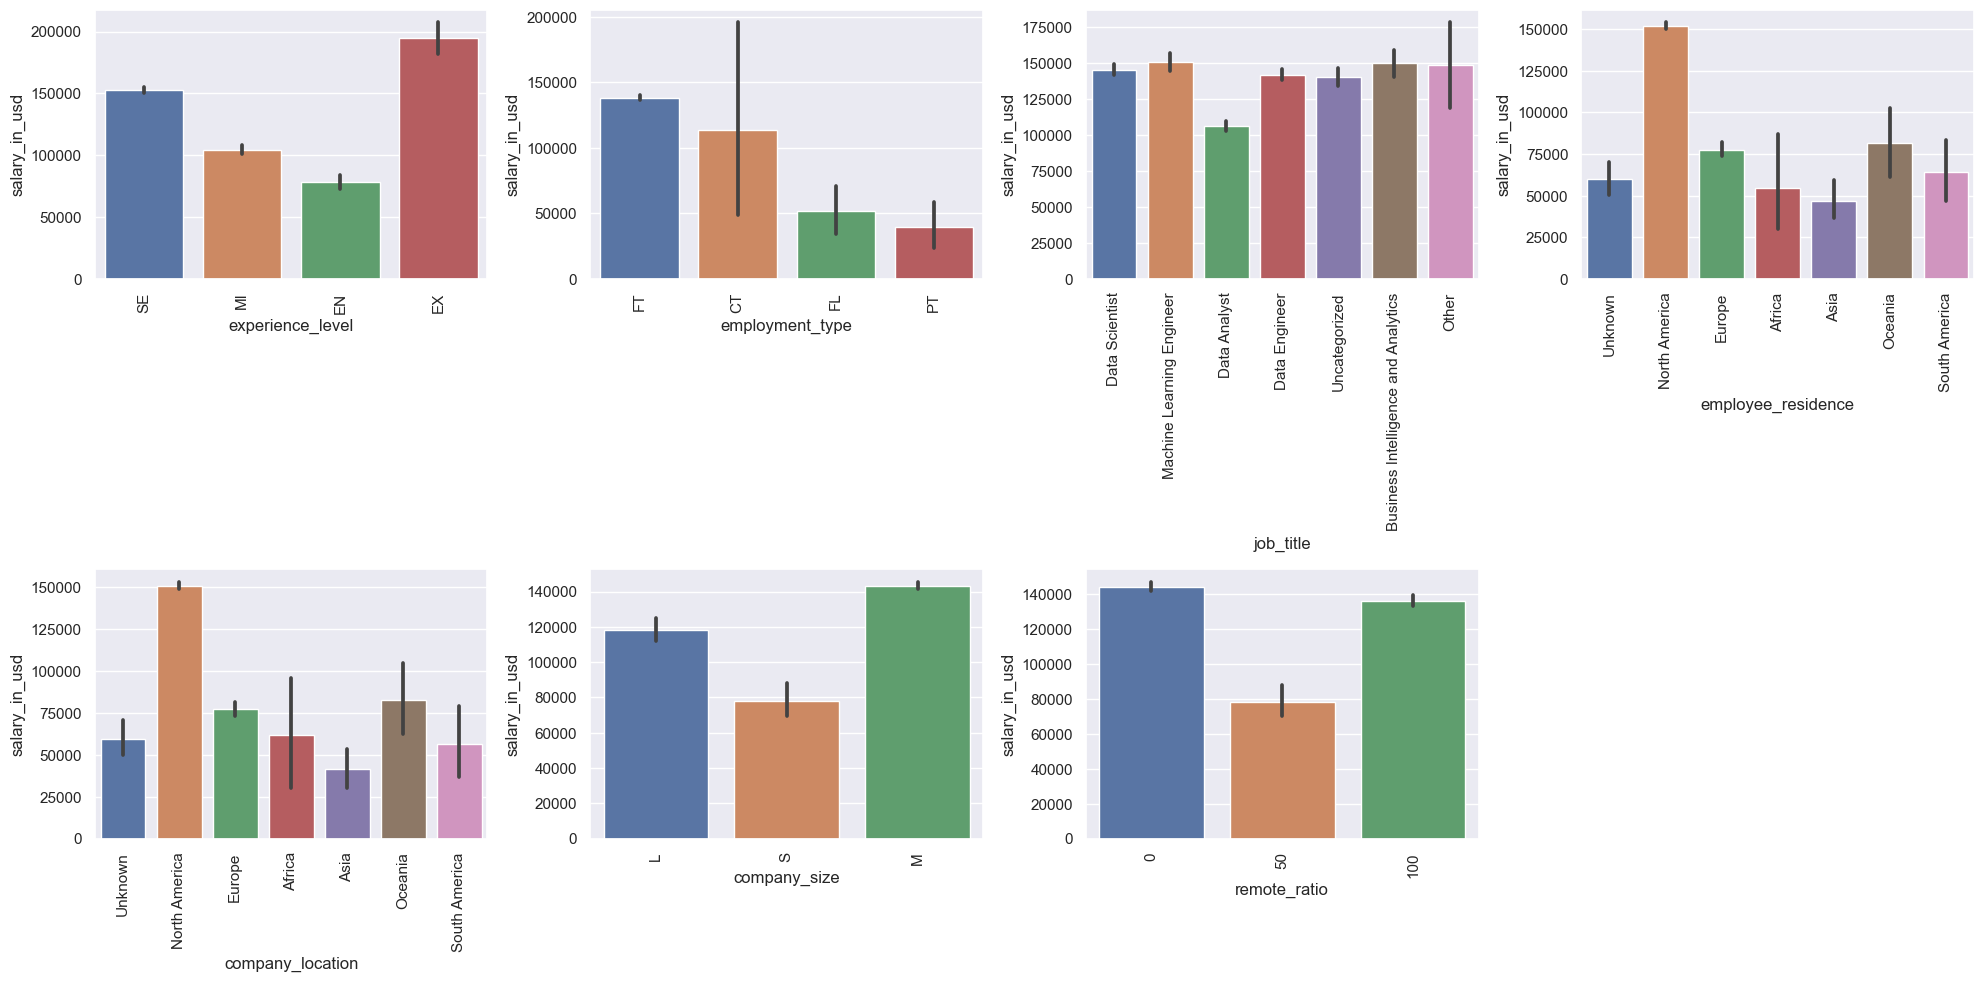

In [31]:
# list of categorical variables to plot
cat_vars = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 
            'company_location', 'company_size', 'remote_ratio']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='salary_in_usd', data=data, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# remove the eighth subplot
fig.delaxes(axs[7])

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

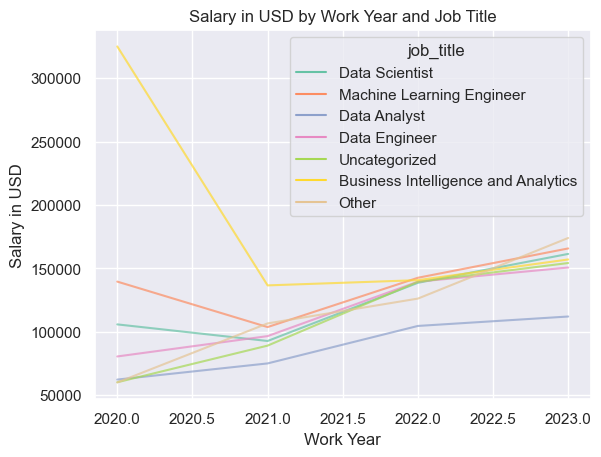

In [32]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.lineplot(x='work_year', y='salary_in_usd', hue='job_title', data=data, ci=None, estimator='mean', alpha=0.7)

plt.title("Salary in USD by Work Year and Job Title")
plt.xlabel("Work Year")
plt.ylabel("Salary in USD")

plt.show()

# Data Preprocessing part-2

In [33]:
for col in data.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {data[col].unique()}")

experience_level: ['SE' 'MI' 'EN' 'EX']
employment_type: ['FT' 'CT' 'FL' 'PT']
job_title: ['Data Scientist' 'Machine Learning Engineer' 'Data Analyst'
 'Data Engineer' 'Uncategorized' 'Business Intelligence and Analytics'
 'Other']
employee_residence: ['Unknown' 'North America' 'Europe' 'Africa' 'Asia' 'Oceania'
 'South America']
company_location: ['Unknown' 'North America' 'Europe' 'Africa' 'Asia' 'Oceania'
 'South America']
company_size: ['L' 'S' 'M']


In [34]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in data.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(data[col].unique())
    
    # Transform the column using the encoder
    data[col] = label_encoder.transform(data[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {data[col].unique()}")

experience_level: [3 2 0 1]
employment_type: [2 0 1 3]
job_title: [3 4 1 2 6 0 5]
employee_residence: [6 3 2 0 1 4 5]
company_location: [6 3 2 0 1 4 5]
company_size: [0 2 1]


In [35]:
data.dtypes

work_year             int64
experience_level      int32
employment_type       int32
job_title             int32
salary_in_usd         int64
employee_residence    int32
remote_ratio          int64
company_location      int32
company_size          int32
dtype: object

# All of the data are categorial so that means, there are no outliers

<AxesSubplot:>

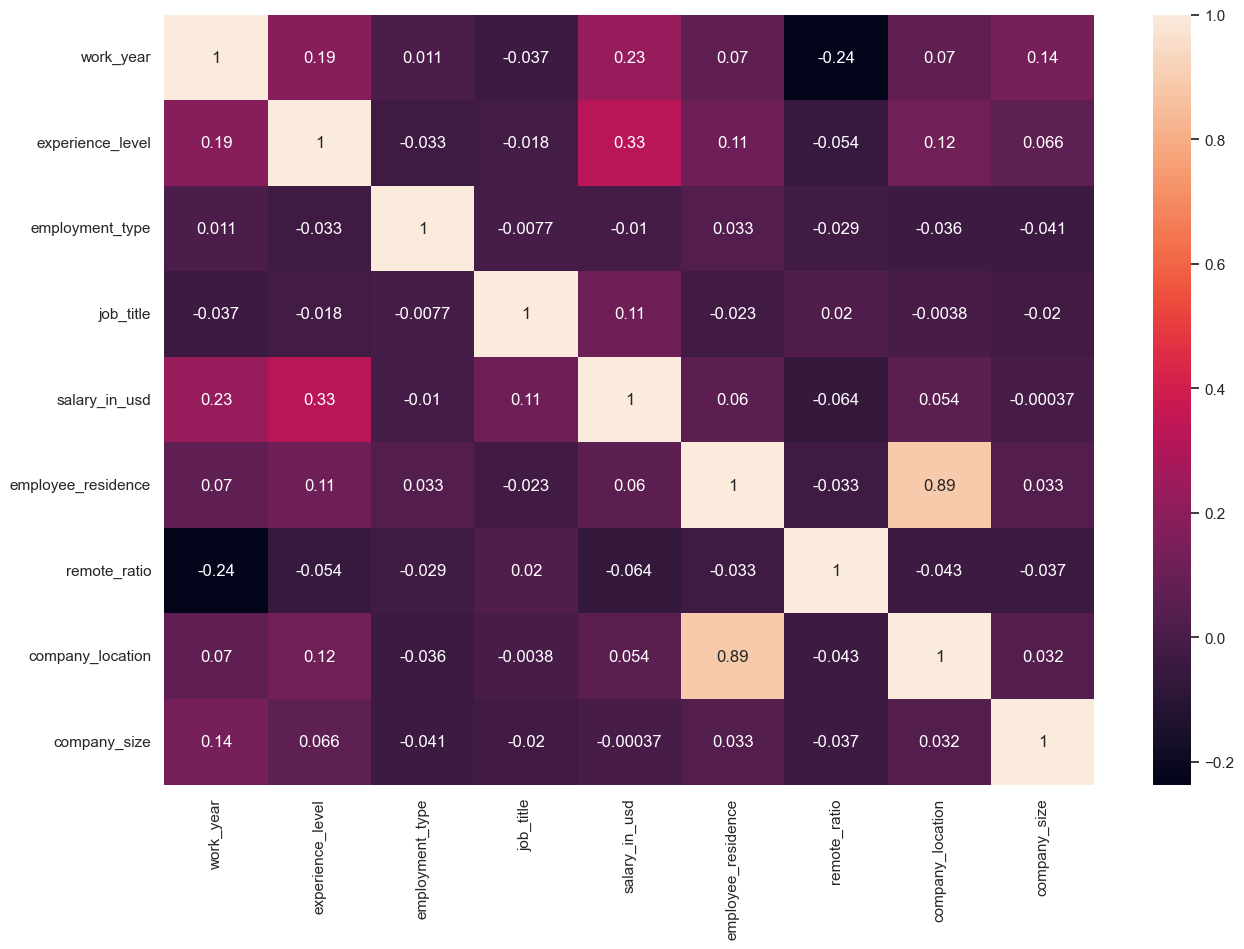

In [37]:
#Correlation Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), fmt='.2g', annot=True)

In [38]:
X = data.drop('salary_in_usd', axis=1)
y = data['salary_in_usd']

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# Decision Tree Regression

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


In [41]:
dtree = DecisionTreeRegressor()

# Define the hyperparameters to tune and their values
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2}


C:\Users\sabeeha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
320 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sabeeha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sabeeha\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\sabeeha\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\sabeeha\anaconda3\lib\s

In [43]:
# from sklearn.tree import DecisionTreeRegressor
# dtree = DecisionTreeRegressor(random_state=0, max_depth=6, max_features='auto', min_samples_leaf=3, min_samples_split=4)
# dtree.fit(X_train, y_train)
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(random_state=0, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=4)
dtree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=6, min_samples_leaf=3, min_samples_split=4,
                      random_state=0)

In [44]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 39982.989072133074
MAPE is 0.3966225664928661
MSE is 2890657437.6238027
R2 score is 0.32248347877074923
RMSE score is 53764.834581944015


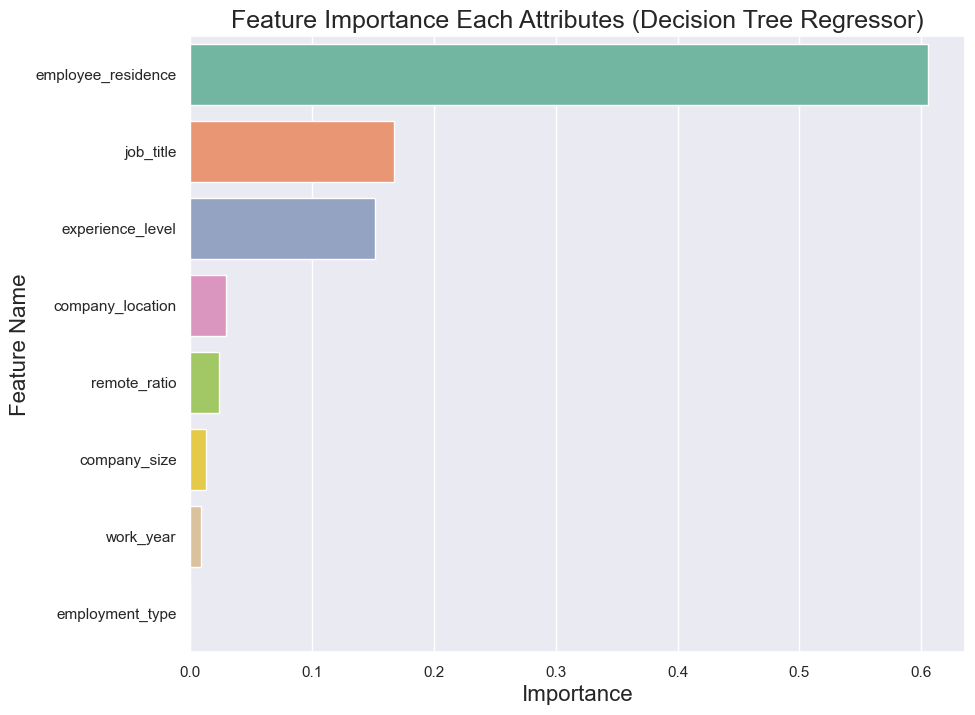

In [45]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

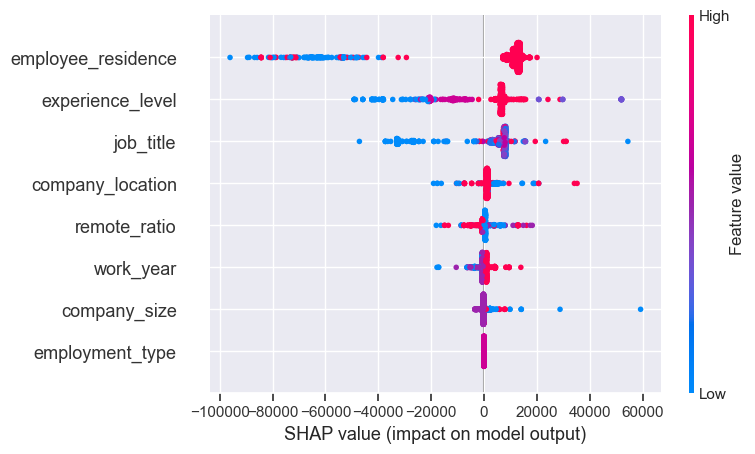

In [47]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

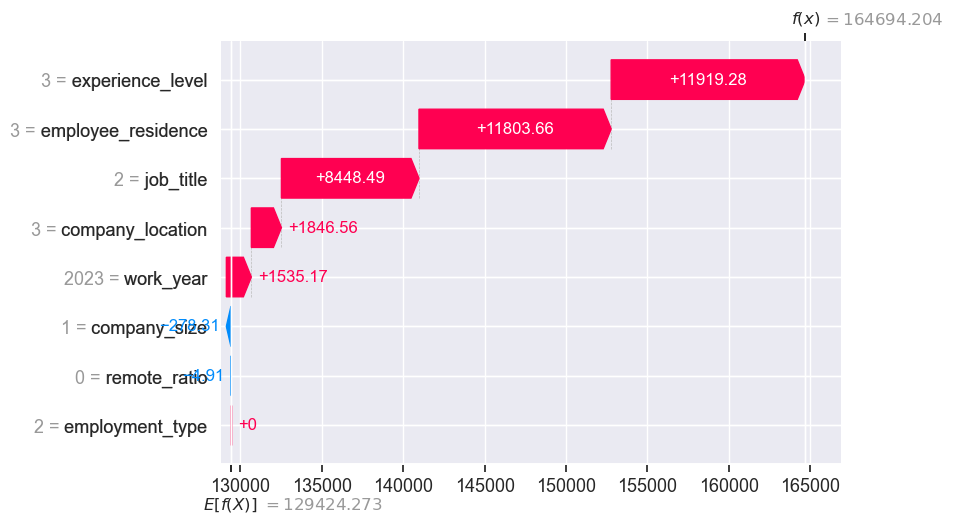

In [48]:
explainer = shap.Explainer(dtree, X_test)
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values[0])

# Random Forest Regressor

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Regressor object
rf = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)


180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sabeeha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sabeeha\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\sabeeha\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\sabeeha\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints
    raise Inva

Best hyperparameters:  {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}


In [51]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0, max_depth=7, min_samples_split=10, min_samples_leaf=2, 
                           max_features=None)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, max_features=None, min_samples_leaf=2,
                      min_samples_split=10, random_state=0)

In [52]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 39078.9148717654
MAPE is 0.37982999896431796
MSE is 2781586526.3528595
R2 score is 0.348047678599401
RMSE score is 52740.748253630794


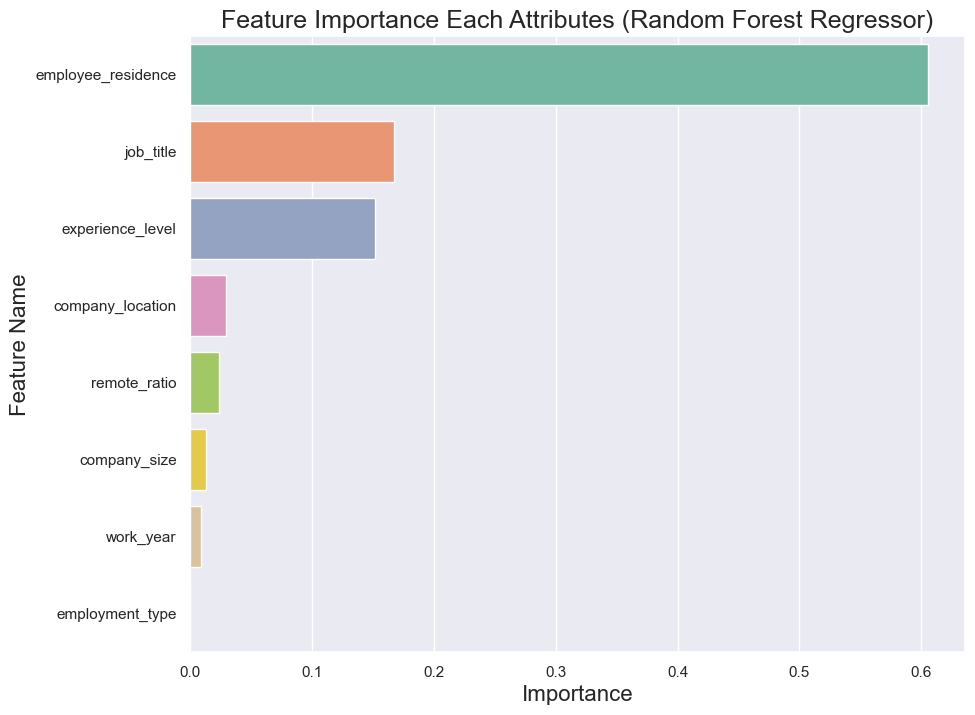

In [53]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

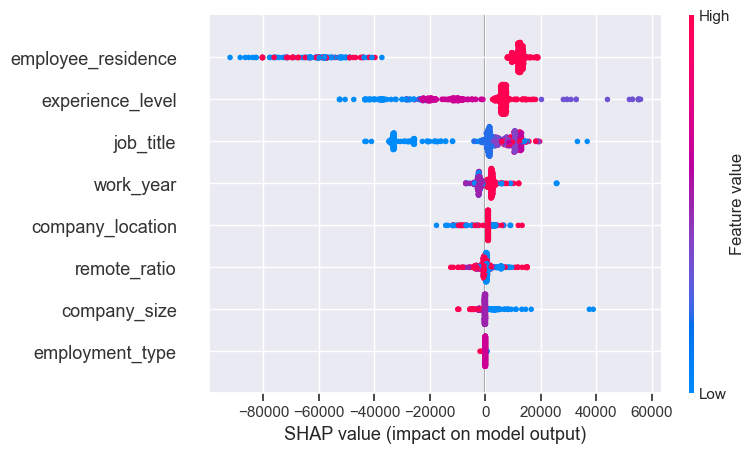

In [54]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

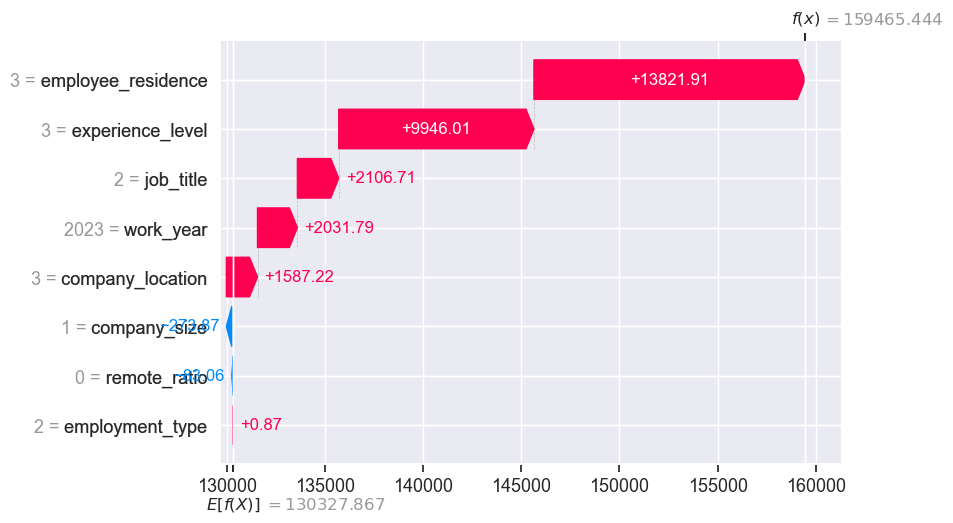

In [55]:
explainer = shap.Explainer(rf, X_test, check_additivity=False)
shap_values = explainer(X_test, check_additivity=False)
shap.plots.waterfall(shap_values[0])